In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
m = 100
X_train = 10 * np.random.rand(m, 1) - 5
y_train = 0.5 * X_train**2 + 2 + np.random.randn(m, 1)

In [3]:
X_test = np.array([np.linspace(X_train.min()-2, X_train.max()+2)]).T

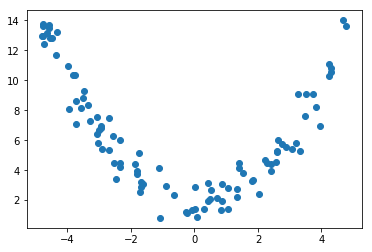

In [4]:
plt.scatter(X_train, y_train);

# Baseline

In [5]:
from sklearn.linear_model import LinearRegression

<div class="panel panel-danger" style="margin: 50px 0 0 0">
    <div class="panel-heading">
        <h3 class="panel-title">Важно</h3> 
    </div>
</div>

У большинства классов sklearn интерфейс базируется на следующих методах:
<ol>
    <li> методах <b>.fit(), .transform(), .fit_transform()</b>, если эта штука каким-то образом меняет данные;
    <li> методах <b>.fit(), .predict(), .fit_predict()</b>, если это классификатор для предсказаний.
</ol>

In [27]:
clf = LinearRegression()
clf.fit(X_train, y_train);

y_test = clf.predict(X_test)

<div style="margin: 50px 0 0 0" />

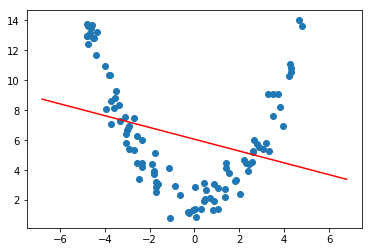

In [7]:
plt.scatter(X_train, y_train);
plt.plot(X_test, y_test, 'r');

# Pipeline

In [8]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline

<div class="panel panel-warning" style="margin: 50px 0 0 0">
    <div class="panel-heading">
        <h3 class="panel-title">Обратите внимание</h3> 
    </div>
</div>

У пайплайнов тот же интерфейс, что и у обычных классификаторов, что делает его удобным.

In [9]:
clf = Pipeline([
    ('1. Добавляем полиномиальные фичи', PolynomialFeatures(degree=2)),
#     ('2. Нормализуем, если используем SGD', StandardScaler()),
    ('3. Используем любимый классификатор', LinearRegression())
])

In [10]:
clf.fit(X_train, y_train);
y_test = clf.predict(X_test)

<div style="margin: 50px 0 0 0" />

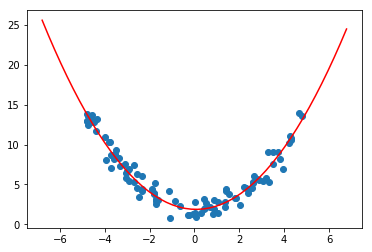

In [11]:
plt.scatter(X_train, y_train);
plt.plot(X_test, y_test, c='r');

# Grid search

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDRegressor

<div class="panel panel-warning" style="margin: 50px 0 0 0">
    <div class="panel-heading">
        <h3 class="panel-title">Обратите внимание</h3> 
    </div>
</div>

GridSearch прогоняет все комбинации гиперпараметров, поэтому в коде ниже будут тренироваться <b>45</b> разных классификаторов! Будьте внимательны и следите в своем коде, чтобы количество прогонов было разумным. Сейчас нам просто повезло, что выборка очень маленькая, и линейные классификаторы очень быстрые.

In [33]:
params = { 
    'n_iter': [100],
    'alpha': [10**x for x in range(-2,3)],
    'l1_ratio': [x*10/100. for x in range(1,10)]
}

In [31]:
gs = GridSearchCV(SGDRegressor(), param_grid=params)
gs.fit(X_train, y_train);

Набор оптимальных параметров лежит в <b>.best\_params_</b>, а сам классификатор - в <b>.best\_estimator_</b>.


In [32]:
gs.best_params_

{'alpha': 1, 'l1_ratio': 0.2, 'n_iter': 100}

In [17]:
y_test = gs.best_estimator_.predict(X_test)

<div style="margin: 50px 0 0 0" />

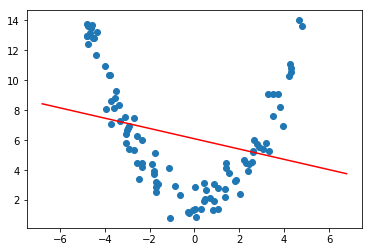

In [18]:
plt.scatter(X_train, y_train);
plt.plot(X_test, y_test, c='r');

# Grid search with Pipeline

In [19]:
from sklearn.linear_model import ElasticNet

<div class="panel panel-danger" style="margin: 50px 0 0 0">
    <div class="panel-heading">
        <h3 class="panel-title">Важно</h3> 
    </div>
</div>

При использовании одновременно пайплайна и перебора параметров по сетке каждый параметр находится по адресу <b><Имя шага>__<Имя параметра></b>, - в середине два нижних подчеркивания (underscores).

In [20]:
clf = Pipeline([
    ('poly_features', PolynomialFeatures()),
    ('scaler', StandardScaler()),
    ('elastic', ElasticNet())
])

In [21]:
params = { 
    'poly_features__degree': [2,5,10],
    'elastic__alpha': [10**x for x in range(-2,3)],
    'elastic__l1_ratio': [x*10/100. for x in range(1,10)]
}

In [22]:
gs = GridSearchCV(clf, param_grid=params)

In [23]:
gs.fit(X_train, y_train);

In [24]:
gs.best_params_

{'elastic__alpha': 0.01, 'elastic__l1_ratio': 0.1, 'poly_features__degree': 5}

In [25]:
y_test = gs.best_estimator_.predict(X_test)

<div style="margin: 50px 0 0 0" />

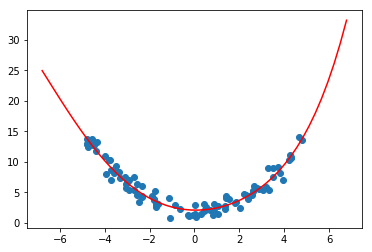

In [26]:
plt.scatter(X_train, y_train);
plt.plot(X_test, y_test, c='r');